In [400]:
# Imports 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

plotly.tools.set_credentials_file(username='mrbalikci', api_key='UOYflXmBJelkNxcCHA0y')

%matplotlib inline

In [401]:
# read the data with all default parameters 
df = pd.read_csv('data_set.csv', index_col='asst_id', encoding='utf-8', low_memory=False)

In [402]:
# data types and non-null counts 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 16664
Data columns (total 18 columns):
product_type           99980 non-null object
mnfture_wk             100000 non-null int64
contract_st            100000 non-null int64
contract_end           100000 non-null int64
contact_wk             100000 non-null int64
contact_type           99986 non-null object
issue_type             85958 non-null object
topic_category         66916 non-null object
parts_sent             54566 non-null object
repair_type            100000 non-null object
repeat_ct              100000 non-null int64
parts_ct               100000 non-null int64
agent_tenure_indays    99986 non-null float64
contact_manager_flg    100000 non-null int64
diagnostics            100000 non-null object
repeat_parts_sent      13346 non-null object
region                 99997 non-null object
country                89998 non-null object
dtypes: float64(1), int64(7), object(10)
memory usage: 14.5+ MB


In [403]:
# take care of missing values for numerical columns 
# replace NaNs with '-888'
df['agent_tenure_indays']=df['agent_tenure_indays'].fillna('-888')

In [404]:
# replace NaNs with 'Unknown' for object type columns
df = df.fillna('Unknown')

# VOICE and Voice can be combined as 'Voice'
df['contact_type']=df['contact_type'].str.replace('VOICE','Voice')

### Time Related Columns to DateTime format

In [405]:
# change type to string
df['mnfture_wk']=df['mnfture_wk'].astype(str)
df['contract_st']=df['contract_st'].astype(str)
df['contract_end']=df['contract_end'].astype(str)
df['contact_wk']=df['contact_wk'].astype(str)

# taking care of mnfture
df['mnfture_year'] = df['mnfture_wk'].str[0:4]
df['mnfture_week'] = df['mnfture_wk'].str[4:6]
df["mnfture_datetime"] = pd.to_datetime(df.mnfture_week.astype(str)+
                          df.mnfture_year.astype(str).add('-0') ,format='%W%Y-%w')

# taking care of contact year
df['contact_year'] = df['contact_wk'].str[0:4]
df['contact_week'] = df['contact_wk'].str[4:6]
df["contact_week_datetime"] = pd.to_datetime(df.contact_week.astype(str)+
                          df.contact_year.astype(str).add('-0') ,format='%W%Y-%w')

# taking care of contract end year
df['contract_year'] = df['contract_end'].str[0:4]
df['contract_week'] = df['contract_end'].str[4:6]
df["contract_end_datetime"] = pd.to_datetime(df.contract_week.astype(str)+
                          df.contract_year.astype(str).add('-0') ,format='%W%Y-%w')

# Data Insights

<strong>CASE 1 

* Exploring Total number of cases over time (Mnfcture_wk) to see if there is a particular spike at any point in time. This could point to some issues in the manufacturing process/batch related to the weeks and help identify the root causes.

* The analysis above could be done in more granular levels, say per product type, issue type etc, topic category etc. </strong>

### Number of Cases Over Time: Each Machine Sold

In [406]:
# get the total case of each machine sold
df_asst_id = df.reset_index()
df_asst_id = pd.DataFrame(df_asst_id.asst_id.value_counts()).reset_index()
df_asst_id = df_asst_id.rename(columns={'index':'asst_id', 'asst_id':'count'})
df_asst_id.head()

,asst_id,count
0,72568,46
1,5183,18
2,7715,14
3,18338,7
4,11152,6


<strong>Findings</strong>: It seems one machine sold 46 times so further analysis on this particular case will not be needed.

### Number of Cases Over Time: Manufactured

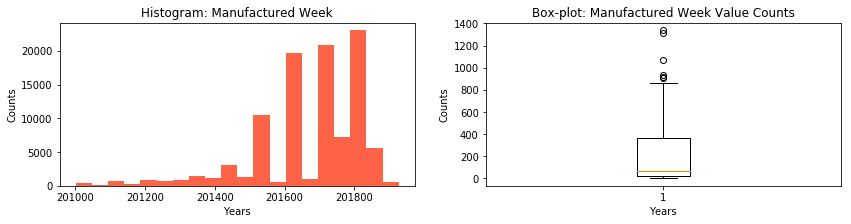

In [141]:
# change the type from object to numerical for mnfture_wk
df['mnfture_wk']=df['mnfture_wk'].astype(float)

# histogram for manufactured week
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14,3))

ax1.hist(df.mnfture_wk, bins=20, color='tomato')
ax1.set_title('Histogram: Manufactured Week')
ax1.set_xlabel('Years')
ax1.set_ylabel('Counts')

ax2.boxplot(df['mnfture_wk'].value_counts())
ax2.set_title('Box-plot: Manufactured Week Value Counts')
ax2.set_xlabel('Years')
ax2.set_ylabel('Counts')

plt.show()

In [412]:
# Manufactured Week Related Statistical Analysis (box-plot)

print('mean {}'.format(df['mnfture_wk'].value_counts().mean()))
print('median {} '.format(df['mnfture_wk'].value_counts().median()))
print('max {}'.format(df['mnfture_wk'].value_counts().max()))
print('min {}'.format(df['mnfture_wk'].value_counts().min()))
print('Range {}'.format((df['mnfture_wk'].value_counts().max())-(df['mnfture_wk'].value_counts().min())))
print('25th Perc {}'.format(df['mnfture_wk'].value_counts().quantile(0.25)))
print('50th Perc {}'.format(df['mnfture_wk'].value_counts().quantile(0.5)))
print('75th Perc {}'.format(df['mnfture_wk'].value_counts().quantile(0.75)))
print('Variance {}'.format(df['mnfture_wk'].value_counts().var()))
print('Standard Deviation {}'.format(df['mnfture_wk'].value_counts().std()))

mean 201.2072434607646
median 64.0 
max 1340
min 1
Range 1339
25th Perc 23.0
50th Perc 64.0
75th Perc 364.0
Variance 60043.85817323293
Standard Deviation 245.038483045486


<strong> Findings I</strong>
* A quick analysis from the histogram graph shows that there are a spike of manufactured defects in some of 2016, 2017, and mainly 2018 years.
* The box-plot shows upper and lower quartiles as well as the median line which is below 200 for that number of cases related to the manufactured weeks.
* The outliers from the box-plot suggests that some of manufactured weeks got big reporting numbers in production defects/issues/process/batch related.

In [129]:
# In this block, sort values based on value counts of manufacture week.
# It will help us to determine the most issue related manufacture related weeks. 

df_count_mnfture_wk = pd.DataFrame(df.mnfture_datetime.value_counts())
df_count_mnfture_wk = df_count_mnfture_wk.rename(columns={'mnfture_datetime':'count'}).reset_index()
df_count_mnfture_wk = df_count_mnfture_wk.rename(columns={'index':'mnfture_datetime'})
df_count_mnfture_wk['percent']= round((df_count_mnfture_wk['count']/df_count_mnfture_wk['count'].sum())*100,4)
df_count_mnfture_wk.head()

,mnfture_datetime,count,percent
0,2018-09-30,1340,1.340
1,2018-07-01,1312,1.312
2,2018-06-24,1072,1.072
3,2018-01-07,1053,1.053
4,2018-04-01,938,0.938


In [9]:
# Bar-Chart for Manufactured vs Cases Over Time

x=df_count_mnfture_wk['mnfture_datetime']
y=df_count_mnfture_wk['count'] 

data = [
    go.Bar(
        x=x, # assign x as the dataframe column 'x'
        y=y
    )
]

layout = go.Layout(
    barmode='stack',
    title='Manufactured vs Cases Over Time'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

<strong>Findings II</strong>:
* As seen from the bar-chart there is positive correlation of cases all the way up to 2018 if 2019 cases are ignored. 

* There is a spike in 2018 in terms of number of cases rising. Perhaps, this could point to some of the issues in the manufacturing process/batch related to the weeks and help identify the root causes.
* The analysis above gave us some idea what manufactured years and weeks got higher cases. By using this analysis, we can focus on what particular product type, repair type, parts, etc in more details as part of the risk assessment for the future cost related operations.

### Number of Cases Over Time: Product Type



In [10]:
# grab data for product type and number of cases over time
df_count_product_type = pd.DataFrame(df.product_type.value_counts(normalize=True)).reset_index()
df_count_product_type = df_count_product_type.rename(columns={'product_type':'count'})
df_count_product_type = df_count_product_type.rename(columns={'index':'product_type'})
df_count_product_type.head()

,product_type,count
0,Laptops,0.73052
1,Desktops,0.23601
2,Other Electronics,0.03327
3,Unknown,0.00020


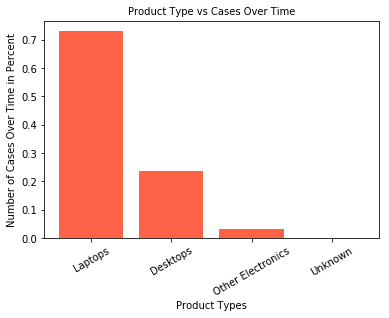

In [165]:
# create a bar chart of the findings 

labels_product_type=df_count_product_type['product_type']
values_product_type=df_count_product_type['count']

def product_type_bar_plot():
    # this is for plotting purpose
    index = np.arange(len(labels_product_type))
    plt.bar(index, values_product_type, color='tomato')
    plt.xlabel('Product Types', fontsize=10)
    plt.ylabel('Percent of Cases Over Time', fontsize=10)
    plt.xticks(index, labels_product_type, fontsize=10, rotation=30)
    plt.title('Product Type vs Cases Over Time', fontsize=15)
    plt.show()
product_type_bar_plot()

<strong>Findings</strong>: 
* As seen above laptops seem giving more issues compared with other product types.
* Almost 73% of cases are over laptops as seen from the cart. 

### Number of Cases Over Time: Repair Type

In [12]:
# grab data for repair type and number of cases over time

df_count_repair_type = pd.DataFrame(df.repair_type.value_counts(normalize=True)).reset_index()
df_count_repair_type = df_count_repair_type.rename(columns={'repair_type':'count'})
df_count_repair_type = df_count_repair_type.rename(columns={'index':'repair_type'})
df_count_repair_type.head()

,repair_type,count
0,Hard,0.59495
1,Soft,0.40505


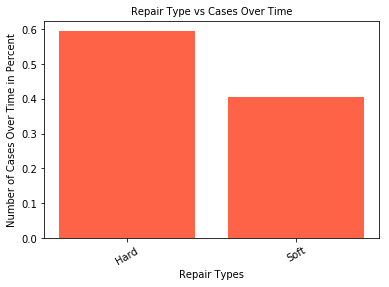

In [167]:
# create a bar chart of the findings 

labels_repair_type=df_count_repair_type['repair_type']
values_repair_type=df_count_repair_type['count']

def repair_type_bar_plot():
    # this is for plotting purpose
    index = np.arange(len(labels_repair_type))
    plt.bar(index, values_repair_type, color='tomato')
    plt.xlabel('Repair Types', fontsize=10)
    plt.ylabel('Percent of Cases Over Time', fontsize=10)
    plt.xticks(index, labels_repair_type, fontsize=10, rotation=30)
    plt.title('Repair Type vs Cases Over Time', fontsize=15)
    plt.show()
repair_type_bar_plot()

<strong>Findings</strong>:
* Approximately 59% of issues are related to hard-ware problems.

### Number of Cases Over Time: Parts Sent

In [14]:
# filtering data 
df_count_parts_sent = pd.DataFrame(df.parts_sent.value_counts(normalize=True)).reset_index()
df_count_parts_sent = df_count_parts_sent.rename(columns={'parts_sent':'percent'})
df_count_parts_sent = df_count_parts_sent.loc[df_count_parts_sent['percent'] >0.003,:]
df_count_parts_sent = df_count_parts_sent.rename(columns={'index':'parts_sent'})
# df_count_parts_sent = df_count_parts_sent.iloc[1:] # 45% 'unknown' is dropped
df_count_parts_sent.head()

,parts_sent,percent
0,Unknown,0.45434
1,Hard Drive,0.04504
2,"Motherboard, Documentation",0.04405
3,LCD Panel,0.03022
4,Keyboard,0.02981


In [15]:
# plot the data by plotly

x=df_count_parts_sent['parts_sent']
y=df_count_parts_sent['percent'] 

data = [
    go.Bar(
        x=x, # assign x as the dataframe column 'x'
        y=y
    )
]

layout = go.Layout(
    barmode='stack',
    title='Parts Sent vs Cases Over Time'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

<strong>Findings</strong>:
* Hard Drive, Motherboard, LCD Panel are top 3 items sent more and more compared to the other parts over time
* About 45% of the parts sent over time is 'unknown'.

### Number of Cases Over Time: Contact Type

In [16]:
# data for contact type

df_count_contact_type = pd.DataFrame(df.contact_type.value_counts(normalize=True)).reset_index()
df_count_contact_type = df_count_contact_type.rename(columns={'contact_type':'percent'})
df_count_contact_type = df_count_contact_type.rename(columns={'index':'contact_type'})
df_count_contact_type

,contact_type,percent
0,Voice,0.84162
1,CHAT,0.14425
2,EMAIL,0.01281
3,Unknown,0.00132


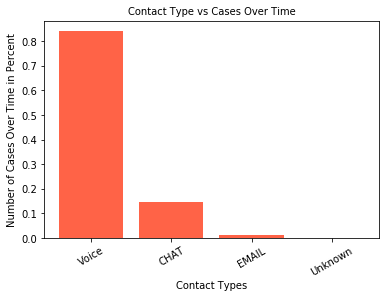

In [168]:
# create a bar chart of the findings 

labels_contact_type=df_count_contact_type['contact_type']
values_contact_type=df_count_contact_type['percent']

def contact_type_bar_plot():
    # this is for plotting purpose
    index = np.arange(len(labels_contact_type))
    plt.bar(index, values_contact_type, color='tomato')
    plt.xlabel('Contact Types', fontsize=10)
    plt.ylabel('Percent of Cases Over Time', fontsize=10)
    plt.xticks(index, labels_contact_type, fontsize=10, rotation=30)
    plt.title('Contact Type vs Cases Over Time', fontsize=15)
    plt.show()
contact_type_bar_plot()

<strong>Findings</strong>:
* Voice is preferred as the main source of contact for the issues reporting with 84% rate. 

### Number of Cases Over Time: Topic Category

In [18]:
# data for topic category
df_count_topic_category = pd.DataFrame(df.topic_category.value_counts(normalize=True)).reset_index()
df_count_topic_category = df_count_topic_category.rename(columns={'topic_category':'percent'})
df_count_topic_category = df_count_topic_category.rename(columns={'index':'topic_category'})
df_count_topic_category.head(10)

,topic_category,percent
0,Unknown,0.33084
1,Booting,0.15343
2,LCD/Monitor,0.05452
3,Call Logs,0.04837
4,General Queries,0.04141
5,Hard Drive,0.03534
6,System Performance,0.03459
7,Internet/Wireless,0.03093
8,Keyboard,0.02666
9,Battery,0.02478


In [19]:
# plot the data 

x=df_count_topic_category['topic_category']
y=df_count_topic_category['percent'] 

data = [
    go.Bar(
        x=x,
        y=y
    )
]

layout = go.Layout(
    barmode='stack',
    title='Topic Category vs Number of Cases Over Time'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

<strong>Findings</strong>:
* Booting, LCD/Monitor, Call Logs are top 3 topic categories that are classified as 
    problem by tech support

### Number of Cases Over Time: Region

In [20]:
# gather the data
df_region_country = pd.DataFrame(df.groupby(['region','country']).agg({'region':'count', 'country':'count'}))
df_region_country = df_region_country.rename(columns={'region':'region_count', 'country':'country_count'}).reset_index()
df_region_country.head()

,region,country,region_count,country_count
0,Hogwarts,Diagon Alley,4,4
1,Hogwarts,Gryffindor,17,17
2,Hogwarts,Hog's Head Inn,3,3
3,Hogwarts,Honeyduke's,24,24
4,Hogwarts,Hufflepuff,52,52


<strong>Conclusion</strong>:
Assumed this data is a mock up data so region and country alignment does not make any sense to analyze

### Number of Cases over Time: Product and Repair Types

In [21]:
# Merge product type and repair type and aggregate it based on manufactured week count

df_repair_type_cases_over_time = pd.DataFrame(df.groupby(['product_type','repair_type']).mnfture_wk.count()).sort_values('mnfture_wk', ascending=False)
df_repair_type_cases_over_time = df_repair_type_cases_over_time.rename(columns={'mnfture_wk':'number_of_cases'}).reset_index()
df_repair_type_cases_over_time["product_repair_type"] = df_repair_type_cases_over_time["product_type"].map(str) +"-"+ df_repair_type_cases_over_time["repair_type"]
df_repair_type_cases_over_time['prc_of_cases'] = (df_repair_type_cases_over_time['number_of_cases']/(df_repair_type_cases_over_time['number_of_cases'].sum()))*100
df_repair_type_cases_over_time.head(10)

,product_type,repair_type,number_of_cases,product_repair_type,prc_of_cases
0,Laptops,Hard,45897,Laptops-Hard,45.897
1,Laptops,Soft,27155,Laptops-Soft,27.155
2,Desktops,Soft,12047,Desktops-Soft,12.047
3,Desktops,Hard,11554,Desktops-Hard,11.554
4,Other Electronics,Hard,2043,Other Electronics-Hard,2.043
5,Other Electronics,Soft,1284,Other Electronics-Soft,1.284
6,Unknown,Soft,19,Unknown-Soft,0.019
7,Unknown,Hard,1,Unknown-Hard,0.001


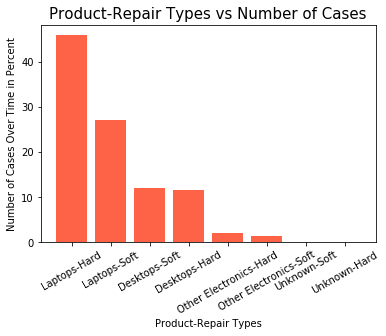

In [170]:
# create a bar chart of the findings 

labels_product_repair_type=df_repair_type_cases_over_time['product_repair_type']
values_product_repair_type=df_repair_type_cases_over_time['prc_of_cases']

def product_repair_type_bar_plot():
    # this is for plotting purpose
    index = np.arange(len(labels_product_repair_type))
    plt.bar(index, values_product_repair_type, color='tomato')
    plt.xlabel('Product-Repair Types', fontsize=10)
    plt.ylabel('Number of Cases Over Time in Percent', fontsize=10)
    plt.xticks(index, labels_product_repair_type, fontsize=10, rotation=30)
    plt.title('Product-Repair Types vs Number of Cases', fontsize=15)
    plt.show()
product_repair_type_bar_plot()

<strong>Findings</strong>:
* Product type 'Laptop' and Repair Type 'Hard' issues seem the most reported

<strong> CASE 2
* We can look into the correlations between agent_tenure_indays and parts_ct, contact_manager_flg, repeat_ct etc. to understand where the new agent"s are struggling. We can add another dimension for topic category to see if some topics are harder to identify for the new agents than others. </strong>

### Correlations: Agent Tenure Indays vs Contact Manager Flg

In [288]:
# change the type from object to numerical 
df['agent_tenure_indays']=df['agent_tenure_indays'].astype(float)

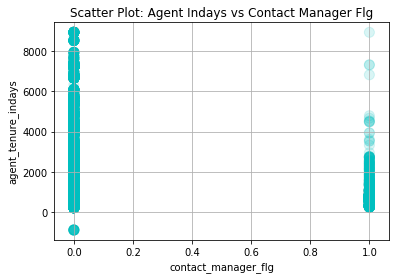

In [287]:
# plot the additional parts sent vs contact type 

x = df.contact_manager_flg
y = df.agent_tenure_indays

# circle sizes based on number of additional visits
area = 100 + df.contact_manager_flg 

plt.scatter(x, y, s=area, c='c', alpha=0.15)
# plt.legend(handles=[voice, chat, email, unknown])
plt.title('Scatter Plot: Agent Indays vs Contact Manager Flg')
plt.xlabel('contact_manager_flg')
plt.ylabel('agent_tenure_indays')
plt.grid()
plt.show()

In [307]:
# number of unique agents, assuming every agent got different hiring dates
agent_unique = len(df.agent_tenure_indays.unique())
print(f"number of agents is {agent_unique}")

# filter data for agents contacted to their manager more than one
df['agent_tenure_indays']=df['agent_tenure_indays'].astype(float)
df_agent_to_contact_mngr = df[['agent_tenure_indays','contact_manager_flg']].reset_index()
df_agent_to_contact_mngr = df_agent_to_contact_mngr.loc[df_agent_to_contact_mngr['contact_manager_flg']==1,:]
df_agent_to_contact_mngr = df_agent_to_contact_mngr.loc[df_agent_to_contact_mngr['agent_tenure_indays']<=1018,:]
agent_unique_less_exp = len(df_agent_to_contact_mngr.agent_tenure_indays.unique())
print(f"number of agents got experience less than 1018 days is {agent_unique_less_exp}")

number of agents is 1045
number of agents got experience less than 1018 days is 160


In [308]:
# find the percent of number of agents who has experience less than 1018 days or equal.

prc_mngr = round((agent_unique_less_exp/agent_unique)*100,2)
print(f"{prc_mngr}% of agents who has experience <= 1018 days tends to get help from their superiors.")

15.31% of agents who has experience <= 1018 days tends to get help from their superiors.


<strong>Findings</strong>:

* Based on the plot above, it can be seen that inexperienced agents sent to take the matter to the contacting manager. 

* From the <em>df_agent_to_contact_mngr</em> that more inexperienced agents tends to contact to their superior comparing experienced ones.

* 15.31% of agents who got experience <= 1018 days tend to get help from their superiors.


### Correlations: Agent Tenure Indays vs Additional Visits

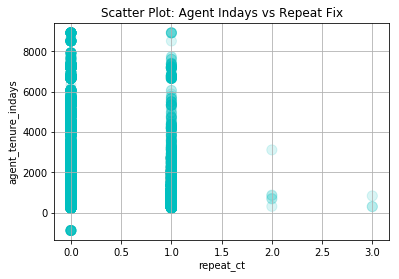

In [319]:
# scatter plot for agent tenure indays vs additional visits

x = df.repeat_ct
y = df.agent_tenure_indays

# circle sizes based on number of repeat fixes
area = 100 + df.repeat_ct 

plt.scatter(x, y, s=area, c='c', alpha=0.15)
# plt.legend(handles=[voice, chat, email, unknown])
plt.title('Scatter Plot: Agent Indays vs Repeat Fix')
plt.xlabel('repeat_ct')
plt.ylabel('agent_tenure_indays')
plt.grid()
plt.show()

In [28]:
# filter data for agents did additional visits more than zero

df['agent_tenure_indays']=df['agent_tenure_indays'].astype(float)
df_agent_repeat_ct = df[['agent_tenure_indays', 'repeat_ct']]
df_agent_repeat_ct = df_agent_repeat_ct.loc[df_agent_repeat_ct['repeat_ct']>0,:]
df_agent_repeat_ct.head()

,agent_tenure_indays,repeat_ct
asst_id,,
6,1757.0,1
19,1250.0,1
25,720.0,1
38,767.0,1
39,1018.0,1


In [310]:
# number of unique agents, assuming every agent got different hiring dates
agent_unique = len(df.agent_tenure_indays.unique())
print(f"number of agents is {agent_unique}")

# filter data for agents contacted to their manager more than one
df['agent_tenure_indays']=df['agent_tenure_indays'].astype(float)
df_agent_repeat_ct = df[['agent_tenure_indays', 'repeat_ct']]
df_agent_repeat_ct = df_agent_repeat_ct.loc[df_agent_repeat_ct['repeat_ct']>0,:]
df_agent_repeat_ct = df_agent_repeat_ct.loc[df_agent_repeat_ct['agent_tenure_indays']<=1018,:]
agent_unique_less_exp_2 = len(df_agent_repeat_ct.agent_tenure_indays.unique())
print(f"number of agents got experience less than 1018 days is {agent_unique_less_exp_2}")

number of agents is 1045
number of agents got experience less than 1018 days is 265


In [312]:
# find the percent of number of agents who has experience less than 1018 days or equal.

prc_repeat = round((agent_unique_less_exp_2/agent_unique)*100,2)
print(f"{prc_repeat}% of agents who has experience <= 1018 days tends to do additional visits")

25.36% of agents who has experience <= 1018 days tends to do additional visits


<strong>Findings</strong>:
* More additional visits were made by more inexperienced tech support comparing experienced ones.
* 25.36% of agents who has experience <= 1018 days tends to do additional visits

### Correlations: Agent Tenure Indays vs Parts Sent

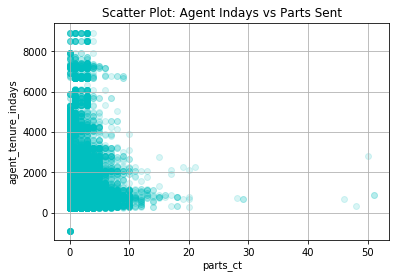

In [322]:
# scatter plot for agent tenure indays vs additional visits

x = df.parts_ct
y = df.agent_tenure_indays

plt.scatter(x, y, c='c', alpha=0.15)
plt.title('Scatter Plot: Agent Indays vs Parts Sent')
plt.xlabel('parts_ct')
plt.ylabel('agent_tenure_indays')
plt.grid()
plt.show()

In [315]:
# filter data for agents who has experience <= 1018 days and who did send parts more than 1

df['agent_tenure_indays']=df['agent_tenure_indays'].astype(float)
df_agent_parts_ct = df[['agent_tenure_indays', 'parts_ct']]
df_agent_parts_ct = df_agent_parts_ct.loc[df_agent_parts_ct['parts_ct']>1,:]
df_agent_parts_ct = df_agent_parts_ct.loc[df_agent_parts_ct['agent_tenure_indays']<=1018,:]
agent_unique_less_exp_3 = len(df_agent_parts_ct.agent_tenure_indays.unique())
print(f"number of agents got experience less than 1018 days is {agent_unique_less_exp_3}")

number of agents got experience less than 1018 days is 323


In [316]:
prc_parts = round((agent_unique_less_exp_3/agent_unique)*100,2)

print(f"{prc_parts}% of agents who has experience <= 1018 sent more than 1 part")

30.91% of agents who has experience <= 1018 sent more than 1 part


<strong>Conclusion</strong>:
* More parts were sent by inexperienced agents 
* 30.91% of agents who has experience less than or equal to 1018 days sent more than 1 part

<strong> CASE 3
* We can look into the correlation between the repeat_ct and contact_type to see if some communication channels are more effective than others. </strong>

### Correlations: Additional Parts Sent vs Contact Type

In [34]:
# Assigned numerical values to the contact types for correlation
df_contact_type = df
df_contact_type['contact_type']=df_contact_type['contact_type'].str.replace('Voice',"1")
df_contact_type['contact_type']=df_contact_type['contact_type'].str.replace('CHAT',"2")
df_contact_type['contact_type']=df_contact_type['contact_type'].str.replace('EMAIL',"3")
df_contact_type['contact_type']=df_contact_type['contact_type'].str.replace('Unknown',"4")

In [35]:
# change data type to numerical 
df_contact_type['contact_type']=df_contact_type['contact_type'].astype(int)

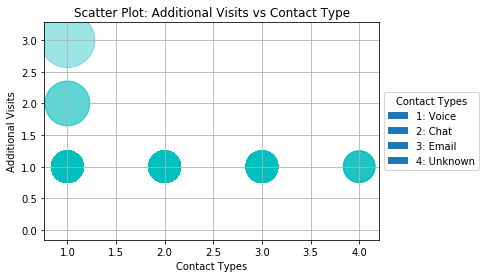

In [73]:
# matplotlib imports 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# plot the additional parts sent vs contact type 
N=50
x = df_contact_type.contact_type
y = df_contact_type.repeat_ct
colors = np.random.rand(N)
# circle sizes based on number of additional visits
area = 1000*df_contact_type.repeat_ct  # 0 to 15 point radii

voice = mpatches.Patch(label='1: Voice')
chat = mpatches.Patch(label='2: Chat')
email = mpatches.Patch(label='3: Email')
unknown = mpatches.Patch(label='4: Unknown')

plt.scatter(x, y, s=area, c='c', alpha=0.15)
plt.legend(handles=[voice, chat, email, unknown])
plt.title('Scatter Plot: Additional Visits vs Contact Type')
plt.legend(handles=[voice, chat, email, unknown], 
           loc='center left', bbox_to_anchor=(1, 0.5), title="Contact Types",fancybox=True)
plt.xlabel('Contact Types')
plt.ylabel('Additional Visits')
plt.grid()
plt.show()

In [72]:
df_visit_contact_type = df.groupby(['contact_type', 'repeat_ct']).repeat_ct.count().unstack()
df_visit_contact_type

repeat_ct,0,1,2,3
contact_type,,,,
1,78141.0,5967.0,6.0,3.0
2,13148.0,1276.0,NaN,NaN
3,1150.0,131.0,NaN,NaN
4,119.0,13.0,NaN,NaN


<strong>Findings</strong>:
* Voice contact type seems got more additional visits required to fix the problem

<strong> CASE 4
* We can look into the correlation between diagnostics and repeat_ct to see if diagnostics are helpful to the agents. We can run a hypothesis testing to see if the effect is significant. </strong>

### Correlations: Diagnostics vs Additional Visits

In [39]:
# Assigned numerical values for type of diagnostics 
df_diag = df
df_diag['diagnostics']=df_diag['diagnostics'].str.replace('Not_USED','1')
df_diag['diagnostics']=df_diag['diagnostics'].str.replace('Effective_Usage','2')
df_diag['diagnostics']=df_diag['diagnostics'].str.replace('InEffective_Usage','3')
df_diag['diagnostics']=df_diag['diagnostics'].str.replace('Not_Considered','4')

# somehow 'inEffective_Usage' replace with 'in2' object so replaced it with 3 again
df_diag['diagnostics']=df_diag['diagnostics'].str.replace('In2','3')

In [40]:
# change type from object to numeric to plot
df_diag['diagnostics']=df_diag['diagnostics'].astype(int)

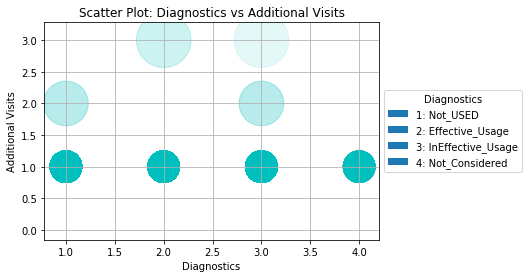

In [74]:
# Scatter Plot for Diagnostics vs Additional Visits

N=50
x = df_diag.diagnostics
y = df_diag.repeat_ct
colors = np.random.rand(N)

# circle size based on additional visits
area = 1000*df_diag.repeat_ct  # 0 to 15 point radii

# lable the diognastics for legend
not_used = mpatches.Patch(label='1: Not_USED')
eff_usag = mpatches.Patch(label='2: Effective_Usage')
ineff_usag = mpatches.Patch(label='3: InEffective_Usage')
not_cons = mpatches.Patch(label='4: Not_Considered')

plt.scatter(x, y, s=area, c='c', alpha=0.1)
plt.legend(handles=[not_used, eff_usag, ineff_usag, not_cons], 
           loc='center left', bbox_to_anchor=(1, 0.5), title="Diagnostics",fancybox=True)
plt.title('Scatter Plot: Diagnostics vs Additional Visits')
plt.xlabel('Diagnostics')
plt.ylabel('Additional Visits')
plt.grid()
plt.show()

<strong>Findings</strong>:
* It is hard to determine which diagnostics type was effective so used hypothesis testing below. 

### Hypothesis Testing: To see if the usage of diagnostics effect is significant

* Hypothesis: If diagnostic has effectively been used for each case, there is a significant effect on customer's additional visit

* Null Hypothesis: If diagnostics not effectively been used for each case, there is not a significant effect on customer's additional visit


In [324]:
# Dependencies
import scipy.stats as stats

In [336]:
# Only get diagnostics and repeat_ct columns for testing
df_diag_repeat_ct = df[['diagnostics','repeat_ct']]
df_diag_repeat_ct.head()

,diagnostics,repeat_ct
asst_id,,
0,Not_USED,0
1,Not_USED,0
2,Not_USED,0
3,Effective_Usage,0
4,Not_USED,0


In [350]:
# Calculate additional visits mean for diagnostics Not_Used which and Effective_Usage
not_used = df_diag_repeat_ct[df_diag_repeat_ct['diagnostics']=='Not_USED']
effective_usage = df_diag_repeat_ct[df_diag_repeat_ct['diagnostics']=='Effective_Usage']

print(f"mean for diagnostics not used {not_used.repeat_ct.mean()}")
print(f"std for diagnostics not used {not_used.repeat_ct.std()}")
print("-------------")
print(f"mean for diagnostics effectively used {effective_usage.repeat_ct.mean()}")
print(f"std for diagnostics effectively used {effective_usage.repeat_ct.std()}")

mean for diagnostics not used 0.06080189728007115
std for diagnostics not used 0.2391543629971682
-------------
mean for diagnostics effectively used 0.08824302998421883
std for diagnostics effectively used 0.2845800181144111


In [351]:
# function to create scatter and histogram plots comparison 

def gendata():
    not_used_diag = not_used.repeat_ct
    effective_usage_diag = effective_usage.repeat_ct
    
    # scatter plot of data
    plt.subplot(2,1,1)
    plt.scatter(range(len(not_used_diag)), not_used_diag, label='not used diagnostics')
    plt.scatter(range(len(effective_usage_diag)), effective_usage_diag, label='effective usage diagnostics')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # histogram plot of data
    plt.subplot(2,1,2)
    plt.hist(not_used_diag, density=True, alpha=0.7, label='not used diagnostics')
    plt.hist(effective_usage_diag, density=True, alpha=0.7, label='effective usage diagnostics')
    plt.axvline(not_used_diag.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(effective_usage_diag.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    return not_used_diag, effective_usage_diag

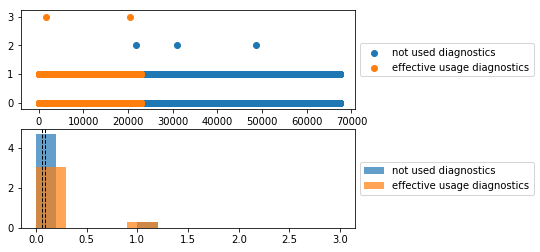

In [352]:
# run the fuction
not_used_diag, effective_usage_diag = gendata()

In [354]:
# Calculate Independent (Two Sample) T-Test
print(stats.ttest_ind(effective_usage.repeat_ct, not_used.repeat_ct, equal_var=False))

Ttest_indResult(statistic=13.085155129188742, pvalue=4.964568799714122e-39)


<strong>Findings</strong>:

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so reject the null hypothesis.

* Hypothesis: If diagnostic has effectively been used for each case, there is a significant effect on customer's additional visit

* That means, if the diagnostics have been effectively used for each case, there is a significant effect on customer's additional visit.

<strong> CASE 5
* We can look into the relation between the time after manufacturing till contact week and topic parts_sent to see what parts are failing when. </strong>

In [50]:
# find the difference in days between contract end and manufacturing time
df['mnfture_to_contact']=df.contract_end_datetime-df.mnfture_datetime
df['mnfture_to_contact_in_days'] = df['mnfture_to_contact'].apply(lambda x: float(x.days))

In [51]:
# we got some negative numbers, filter for positive and zeros
df = df.loc[df.mnfture_to_contact_in_days >= 0,:]

In [52]:
df_mnfture_to_contract = pd.DataFrame(df.groupby('parts_sent').mnfture_to_contact_in_days.mean()).\
            sort_values('mnfture_to_contact_in_days', ascending=True)
df_mnfture_to_contract.head(10)

,mnfture_to_contact_in_days
parts_sent,
"Miscellaneous(2), LCD Panel(6)",147.000000
"Printer, Base Unit",168.000000
"Miscellaneous(2), Battery (Other)(2)",231.000000
"Miscellaneous(2), LCD Panel(2), Hard Drive",256.666667
"Speaker(2), Motherboard, Miscellaneous, Heatsink, Documentation",259.000000
"Motherboard(5), Miscellaneous, Cables(2)",266.000000
"Miscellaneous(2), Adapter, AC(5)",294.000000
"Miscellaneous, LCD Panel(2)",294.000000
"LCD, Adapter, AC",296.333333


<strong>Findings</strong>:
* The time after manufacturing till contact week and topic parts_sent to see what parts are failing shows that top 10 parts above. 
* These numbers were determined based on average numbers of manufacturing until contact week for each parts failing. 
* It seems LCD Panels, Base Unit, Printer, Battery, Hard Drive are top ones failing. 

<strong> CASE 6
* We can look into if people are contacting the support right before their warranty expires. </strong>

In [355]:
# find the difference in days between contact week and contract end time

df['contact_for_contract_end']=df.contact_week_datetime - df.contract_end_datetime
df['contact_for_contract_end'] = df['contact_for_contract_end'].apply(lambda x: float(x.days))
df = df.sort_values('contact_for_contract_end', ascending=True)

value =round((len(df.loc[(df['contact_for_contract_end']<=0) & \
                         (df['contact_for_contract_end']>-365) ,:])/len(df))*100,0)
print(f"{value}% of people who has their contract ending withing a year contacted to the tech support")

36.0% of people who has their contract ending withing a year contacted to the tech support


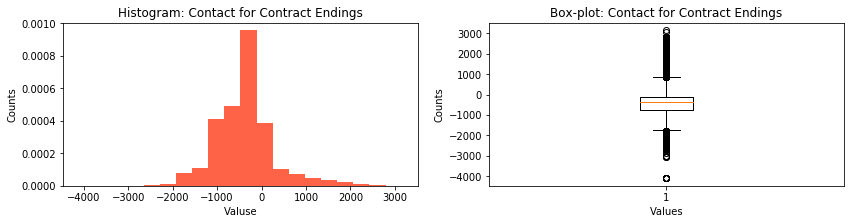

In [365]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14,3))

# histogram for contacting the tech support before the contract ends
# there is a spike for contacting to the tech support right before the contract ends
ax1.hist(df.contact_for_contract_end, density=True, bins=20, color='tomato')
ax1.set_title('Histogram: Contact for Contract Endings')
ax1.set_xlabel('Valuse')
ax1.set_ylabel('Counts')


# box plot suggest that we have outliers 
# and there are some extreme outlier can be ivestigated further
ax2.boxplot(df['contact_for_contract_end'])
ax2.set_title('Box-plot: Contact for Contract Endings')
ax2.set_xlabel('Values')
ax2.set_ylabel('Counts')

plt.show()

In [364]:
print('skewness for contact for contract ending is {0:2f} and the data is right tailed'.format(df.contact_for_contract_end.skew()))

skewness for contact for contract ending is 0.913443 and the data is right tailed


<strong>Findings</strong>:
* 36% of people are contacting the tech support withing a year before their warranty expires

<strong> CASE 7 
* We can look into the correlation between topic_category and repeat_ct to see if some problem types especially lead to additional visits.


In [61]:
df_test = df.groupby(['topic_category','repeat_ct']).repeat_ct.count().sort_values(0, ascending=True).unstack()
df_test=df_test.sort_values(1,ascending=False).groupby('topic_category').head()
df_test.head()

repeat_ct,0,1,2,3
topic_category,,,,
Unknown,30512.0,2554.0,1.0,NaN
Booting,13515.0,1825.0,1.0,NaN
LCD/Monitor,4898.0,549.0,NaN,1.0
Call Logs,4548.0,280.0,4.0,2.0
Hard Drive,3324.0,210.0,NaN,NaN
